<a href="https://colab.research.google.com/github/xavigonzalvo/bright_horizon_checkin/blob/master/Copy_of_bright_horizons_email.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import json
import datetime
import pandas as pd

In [0]:
with open('drive/My Drive/email.json') as json_file:
  data = json.load(json_file)

In [0]:
check_ins = []
for user, times in data.items():
  for time in times:
    hour = int(time[0])
    if hour < 8:
      continue
    timestamp = datetime.datetime(year=2019, month=1, day=1,
                                  hour=hour,
                                  minute=int(time[1]))
    check_ins.append((user, timestamp))
df = pd.DataFrame(check_ins, columns=['Name', 'Timestamp'])

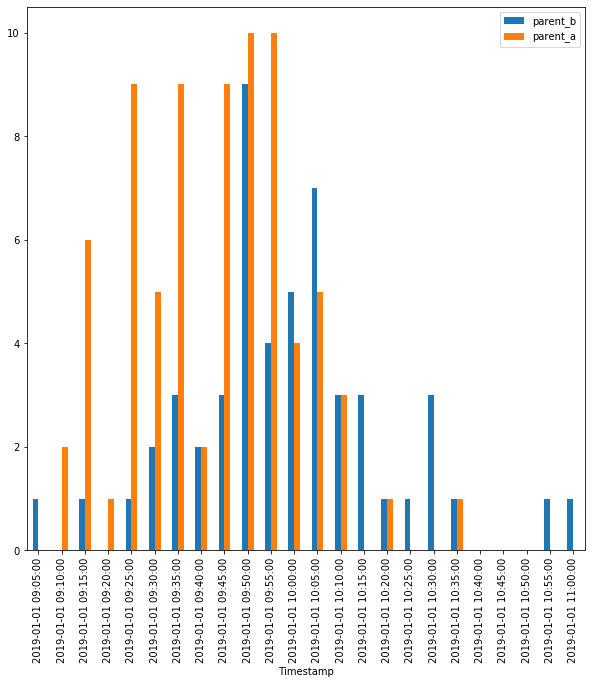

In [8]:
# Setting the date as the index since the TimeGrouper works on Index, the date
# column is not dropped to be able to count.
df.set_index('Timestamp', drop=False, inplace=True)
# Getting the histogram.
freq = '5Min'
count_parent_a = df.loc[df['Name'] == 'parent_a'].groupby(pd.Grouper(freq=freq)).count()
count_parent_a = count_parent_a.drop(columns='Name').rename(columns={'Timestamp': 'parent_a'}).reset_index()

count_parent_b = df.loc[df['Name'] == 'parent_b'].groupby(pd.Grouper(freq=freq)).count()
count_parent_b = count_parent_b.drop(columns='Name').rename(columns={'Timestamp': 'parent_b'}).reset_index()

gg = count_parent_b.merge(count_parent_a, how='outer').fillna(0).astype({'parent_a': 'int32'},
                                                                        {'parent_b': 'int32'})
gg.set_index('Timestamp', drop=False, inplace=True)
gg.drop(columns='Timestamp', inplace=True)
gg.plot(kind='bar', figsize=(10, 10))

In [0]:
print('parent_a', df.loc[df['Name'] == 'parent_a']['Timestamp'].mean(axis=0).strftime("%H:%M"))
print('parent_b', df.loc[df['Name'] == 'parent_b']['Timestamp'].mean(axis=0).strftime("%H:%M"))